# Advanced Machine Learning 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset (iris), split into X_train, y_train, X_test, y_test!
# Write your code here 

dataset = datasets.load_iris()
X = dataset.data
Y = dataset.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

## 1. Voting 

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(42)
# Hint: 
# clf_voting = VotingClassifier( estimators=[('label1', clf_1),
#('label2', clf_2),
#('labelN', clf_N)]) 

# Create the individual models
clf_knn = KNeighborsClassifier(5)
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()

# Create voting classifier
clf_voting = VotingClassifier(estimators=[
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)])

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:0.3f}".format(acc))

Accuracy: 1.000


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
for clf, label in zip([clf_knn, clf_dt, clf_lr, clf_voting], ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Ensemble']):
    clf.fit(X_train, y_train)
    scores = accuracy_score(y_test, clf.predict(X_test))
    print("Accuracy: %0.2f [%s]" % (scores.mean(), label))

Accuracy: 1.00 [K-Nearest Neighbors]
Accuracy: 1.00 [Decision Tree]
Accuracy: 0.98 [Logistic Regression]
Accuracy: 1.00 [Ensemble]


In [46]:
for clf, label in zip([clf_knn, clf_dt, clf_lr, clf_voting], ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Ensemble']):
...     scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
...     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.97 (+/- 0.02) [K-Nearest Neighbors]
Accuracy: 0.95 (+/- 0.03) [Decision Tree]
Accuracy: 0.96 (+/- 0.04) [Logistic Regression]
Accuracy: 0.97 (+/- 0.04) [Ensemble]


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
print(confusion_matrix(y_train,clf_voting.predict(X_train)))

[[31  0  0]
 [ 0 35  2]
 [ 0  1 36]]


In [10]:
print(confusion_matrix(y_test,clf_voting.predict(X_test)))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [71]:
### print(classification_report(y_train,clf_voting.predict(X_train)))

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 2. Averaging 

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Hint: 
# clf_voting = VotingClassifier( estimators=[('label1', clf_1),
#('label2', clf_2),
#('labelN', clf_N)]) 

# Create the individual models
clf_knn = KNeighborsClassifier(5)
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()

# Create voting classifier
clf_voting = VotingClassifier(estimators=[
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)], voting='soft', weights=[0.1,5,0.1])

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:0.3f}".format(acc))

Accuracy: 1.000


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(confusion_matrix(y_train,clf_voting.predict(X_train)))

[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]


In [61]:
print(confusion_matrix(y_test,clf_voting.predict(X_test)))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [62]:
print(classification_report(y_train,clf_voting.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [64]:
# # Template for averaging Classifier 

# from sklearn.ensemble import VotingClassifier

# clf_voting = VotingClassifier(
# estimators=[
# ('label1', clf_1),
# ('label2', clf_2),
# ...
# ('labelN', clf_N)],
# voting='soft',
# weights=[w_1, w_2, ..., w_N]
# )

In [65]:
# Initiate the individual models 

# Write your code here! 

# Create averaging classifier

# Write your code here! 

## 3. Bagging
### K-Nearest Neighbors

In [77]:
X = datasets.load_breast_cancer().data
Y = datasets.load_breast_cancer().target

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                           max_samples=0.5, max_features=0.5)

In [81]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [83]:
print(confusion_matrix(y_train,bagging.predict(X_train)))

[[126  23]
 [  5 244]]


In [84]:
print(confusion_matrix(y_test,bagging.predict(X_test)))

[[ 57   6]
 [  3 105]]


In [85]:
print(classification_report(y_train,bagging.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       149
           1       0.91      0.98      0.95       249

   micro avg       0.93      0.93      0.93       398
   macro avg       0.94      0.91      0.92       398
weighted avg       0.93      0.93      0.93       398



In [86]:
print(classification_report(y_test,bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [89]:
# Get the accuracy score
acc = accuracy_score(y_test, bagging.predict(X_test))
print("Accuracy: {:0.3f}".format(acc))

Accuracy: 0.947


### Decision Tree

In [90]:
# Write your code here if base classifier = decision tree!
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           max_samples=0.5, max_features=0.5)

In [91]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [92]:
print(confusion_matrix(y_train,bagging.predict(X_train)))

[[144   5]
 [  3 246]]


In [93]:
print(confusion_matrix(y_test,bagging.predict(X_test)))

[[ 59   4]
 [  6 102]]


In [94]:
print(classification_report(y_train,bagging.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       149
           1       0.98      0.99      0.98       249

   micro avg       0.98      0.98      0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [95]:
print(classification_report(y_test,bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        63
           1       0.96      0.94      0.95       108

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [96]:
# Get the accuracy score
acc = accuracy_score(y_test, bagging.predict(X_test))
print("Accuracy: {:0.3f}".format(acc))

Accuracy: 0.942


### Random Forest

In [122]:
print(datasets.load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [97]:
# Write your code here if you use RandomForest, compare with above!
from sklearn.ensemble import RandomForestClassifier

In [111]:
random_forest = RandomForestClassifier(n_estimators = 500)

In [112]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
print(confusion_matrix(y_train,random_forest.predict(X_train)))

[[149   0]
 [  0 249]]


In [114]:
print(confusion_matrix(y_test,random_forest.predict(X_test)))

[[ 59   4]
 [  1 107]]


In [103]:
print(classification_report(y_train,random_forest.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

   micro avg       1.00      1.00      1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [104]:
print(classification_report(y_test,random_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [105]:
# Get the accuracy score
acc = accuracy_score(y_test, random_forest.predict(X_test))
print("Accuracy: {:0.3f}".format(acc))

Accuracy: 0.947


In [125]:
import matplotlib.pyplot as plt

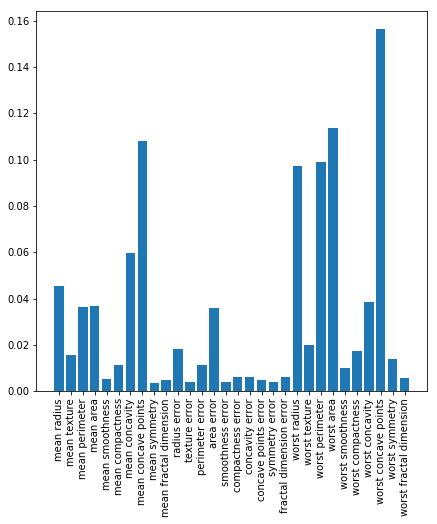

In [136]:
plt.figure(figsize = (7,7))
plt.bar(datasets.load_breast_cancer()['feature_names'],random_forest.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## 4. Boosting
Source: https://scikit-learn.org/stable/modules/ensemble.html

In [162]:
dataset_bc = pd.DataFrame(columns = datasets.load_breast_cancer()['feature_names'], data = datasets.load_breast_cancer().data)
dataset_bc['target'] = datasets.load_breast_cancer().target

In [164]:
dataset_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Create AdaBoost Classifier for iris dataset!

In [144]:
# Write your code here!
clf_ada = AdaBoostClassifier(random_state=42)

In [145]:
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42)

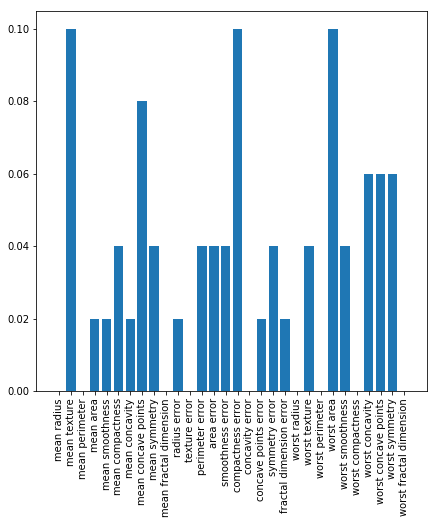

In [148]:
plt.figure(figsize = (7,7))
plt.bar(datasets.load_breast_cancer()['feature_names'],clf_ada.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### AdaBoost Regressor

In [138]:
# from sklearn.ensemble import AdaBoostRegressor

# reg_ada = AdaBoostRegressor(
# base_estimator,
# n_estimators,
# learning_rate,
# loss
# )

# base_estimator
# Default: Decision Tree (max_depth=3)
# loss
# linear (default)
# square
# exponential

### Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
clf_boost = GradientBoostingClassifier()

In [150]:
clf_boost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

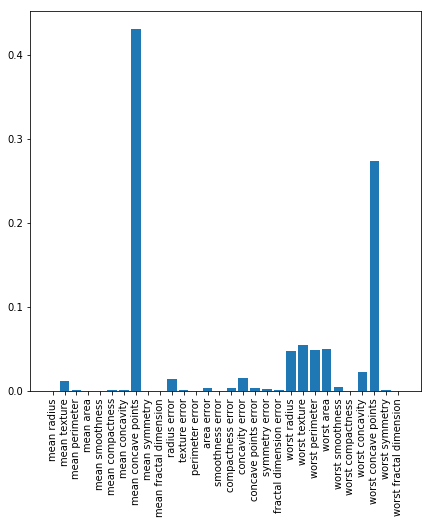

In [151]:
plt.figure(figsize = (7,7))
plt.bar(datasets.load_breast_cancer()['feature_names'],clf_boost.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### Create GradientBoostingClassifier for iris Dataset!

In [ ]:
# Write your code here!

In [ ]:
# import xgboost as xgb => ini mesti install dulu 
# import lightgbm as lgb
# import catboost as cb
# Cek di sini: 
# https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform

### Create XGBoost, lightgbm, catboost for iris Dataset

In [165]:
import xgboost as xgb

In [170]:
xgb_model = xgb.XGBClassifier()

In [171]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

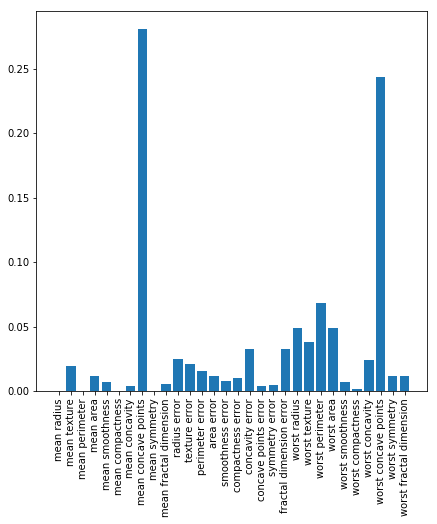

In [173]:
plt.figure(figsize = (7,7))
plt.bar(datasets.load_breast_cancer()['feature_names'],xgb_model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

## 5. Stacking  

In [255]:
from mlxtend.classifier import StackingClassifier

In [262]:
np.random.seed(42)

# Instantiate the 1st-layer classifiers
clf1 = KNeighborsClassifier()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = xgb.XGBClassifier()

# clf1 = KNeighborsClassifier()
# clf2 = DecisionTreeClassifier()
# clf3 = RandomForestClassifier()
# clf4 = LogisticRegression()

# Instantiate the 2nd-layer classifier
# clf_meta = xgb.XGBClassifier()
clf_meta = LogisticRegression()

# Build the Stacking classifier
clf_stack = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4],
                               meta_classifier = clf_meta,
                               use_probas = False,
                               use_features_in_secondary = False)

# Use the fit and predict methods
# like with scikit-learn estimators
clf_stack.fit(X_train, y_train)
pred = clf_stack.predict(X_test)

In [263]:
np.random.seed(42)
for clf, label in zip([clf1, clf2, clf3, clf4, clf_stack], ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'Stacked-XGBoost']):
    clf.fit(X_train, y_train)
    scores_test = accuracy_score(y_test, clf.predict(X_test))
    scores_train = accuracy_score(y_train, clf.predict(X_train))
    print("Accuracy Train: %0.3f [%s]" % (scores_train.mean(), label))
    print("Accuracy Test: %0.3f [%s]" % (scores_test.mean(), label))
    print("------------------------------------------------------")

Accuracy Train: 0.922 [K-Nearest Neighbors]
Accuracy Test: 0.959 [K-Nearest Neighbors]
------------------------------------------------------
Accuracy Train: 1.000 [Decision Tree]
Accuracy Test: 0.942 [Decision Tree]
------------------------------------------------------
Accuracy Train: 0.995 [Logistic Regression]
Accuracy Test: 0.959 [Logistic Regression]
------------------------------------------------------
Accuracy Train: 1.000 [Random Forest]
Accuracy Test: 0.965 [Random Forest]
------------------------------------------------------
Accuracy Train: 1.000 [Stacked-XGBoost]
Accuracy Test: 0.971 [Stacked-XGBoost]
------------------------------------------------------


In [265]:
# plt.figure(figsize = (7,7))
# plt.bar(['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'Random Forest'], clf_stack.meta_clf_.feature_importances_)
# plt.xticks(rotation = 90)
# plt.show()

In [266]:
clf_stack.

False